# Comment 
- 总体来说完成的不错
- 第一问中的高斯拟合图同样需要显示出来
- 高斯拟合的时候注意选取区间的问题，宁可少点，也不多点，否则来自于其他部分的干扰会影响拟合的结果，需要对每个峰单独选取拟合范围
- 残差是加入刻度系数后能谱图重新拟合各峰位置与真值的比较，而不是ch峰位置加入刻度系数后的结果，两者存在一定差异。

In [1]:
//%jsroot on
TCanvas *c1 = new TCanvas("c1");

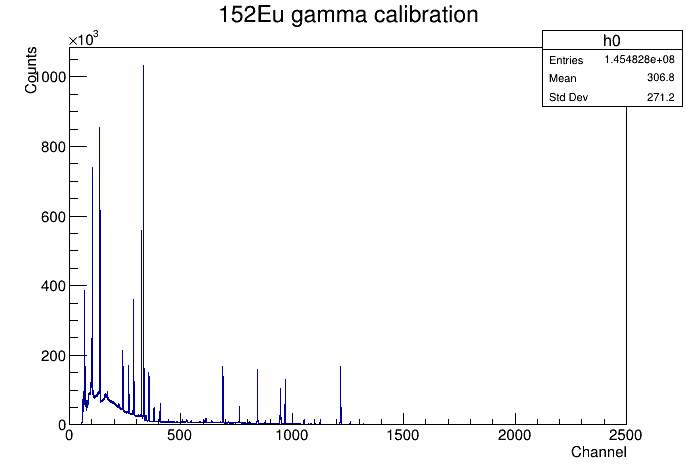

In [2]:
// 从文件中读取能谱

TFile *filer = new TFile("gamma.root","READ");// 以只读模式打开ROOT文件
if(!filer->IsOpen())
  {
    std::cout<<"Can't open root file"<<std::endl;
  }

TH1F *h_gammaraw = (TH1F*)filer->Get("h0");//通过指针读取原始gamma谱

//gPad->SetLogy();

h_gammaraw->GetXaxis()->SetTitle("Channel");
h_gammaraw->GetYaxis()->SetTitle("Counts");
h_gammaraw->GetXaxis()->SetRangeUser(0, 2500);
h_gammaraw->Draw();

c1->Draw();


# 利用两点的值对刻度公式进行粗略计算
<font size =4>由Eu152的能谱可以知道，1217对应的能量为1408.0keV，969对应的能量为1112.1keV。利用这两个点对刻度公式进行粗略估计。

- <font size = 4>定义拟合函数

In [3]:
//设定输入的直方图，拟合左右边界与显示左右边界
void Fit(TH1F *hist, double r_fit, double l_fit, double r_show, double l_show){
    hist->GetXaxis()->SetRangeUser(0, 2500);
    hist->Fit("gaus", " ", " ", r_fit, l_fit);//利用高斯函数进行拟合
    hist->Draw();
    hist->GetXaxis()->SetRangeUser(r_show, l_show);
}

- <font size = 4>进行拟合

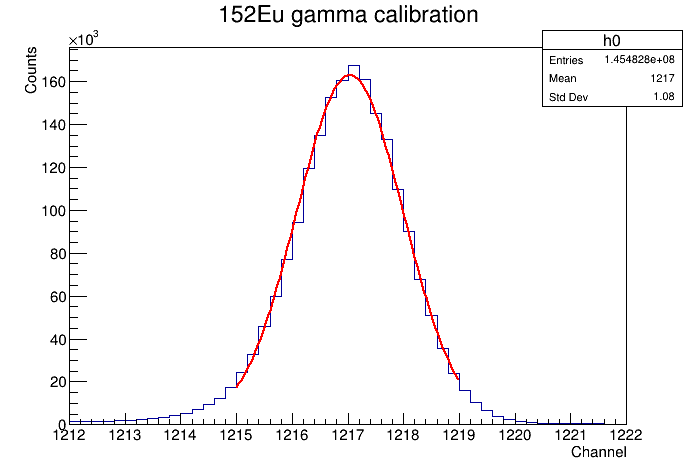

 FCN=1802.86 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.33435e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.62855e+05   1.56384e+02   2.45958e+00   1.93285e-06
   2  Mean         1.21705e+03   7.78963e-04   5.80332e-04  -5.41540e-01
   3  Sigma        9.58711e-01   7.45859e-04   4.33426e-06  -2.37119e-02


In [4]:
Fit(h_gammaraw, 1215, 1219, 1212, 1222);
c1->Draw();

<font size = 4>由Eu152的能谱可以得到，1217处的ch值为1217.05，sigma值为0.958，对应的能量为1408.0keV

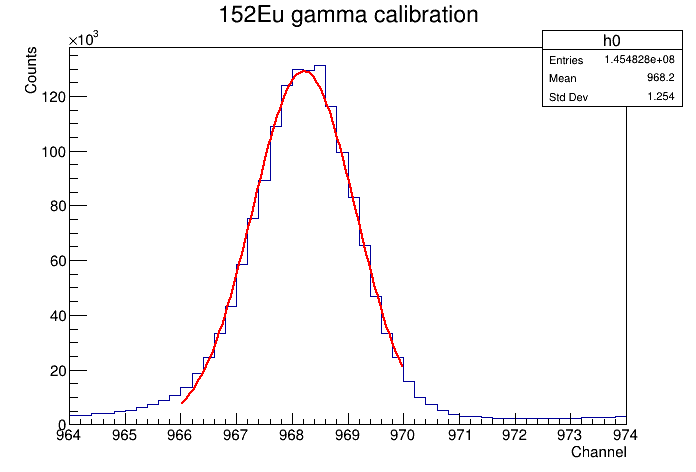

 FCN=4202.98 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=4.02073e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.29013e+05   1.42491e+02   3.39700e+00  -7.60905e-07
   2  Mean         9.68221e+02   8.55644e-04   4.61684e-04  -2.71289e-01
   3  Sigma        9.26576e-01   8.24707e-04   7.44600e-06   2.67977e-01


In [5]:
Fit(h_gammaraw, 966, 970, 964, 974);
c1->Draw();

<font size =4>由Eu152的能谱可以得到，969处的ch值为968.22，sigma为0.927，对应的能量为1112.1keV

- <font size = 4> 利用两点对线性的刻度公式进行拟合

In [6]:
//点值以及误差值的设定
double ch[2] = {1217.05, 968.22};
double ch_error[2] = {0.0008, 0.0009};
double en[2] = {1408, 1112.1};
double en_error[2] = {0., 0.};
TGraphErrors *h1 = new TGraphErrors(2,ch,en,ch_error,en_error);
TGraph *h2 = new TGraph(2,ch,en);

h2->GetXaxis()->SetTitle("Channel");
h2->GetYaxis()->SetTitle("Energy(keV)");

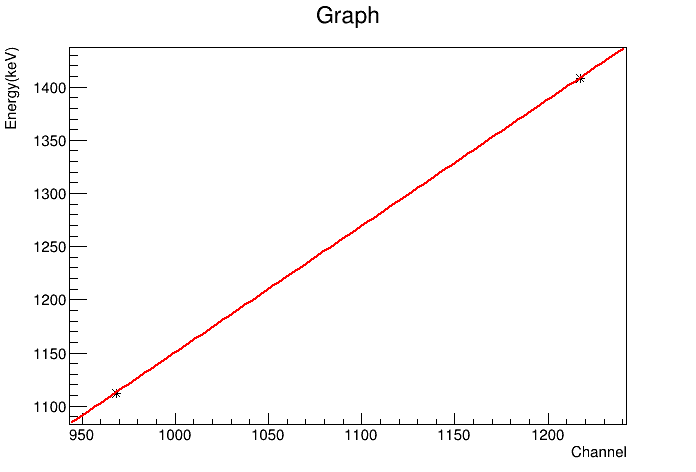


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  3.51552e-21
NDf                       =            0
Edm                       =  7.09492e-21
NCalls                    =           43
p0                        =     -39.2736   +/-   6.25007     
p1                        =      1.18917   +/-   0.00568345  


In [7]:
c1->Clear();
TF1 *linear_relation = new TF1("linear_relation", "[0]+[1]*x", 0, 2500);//定义线性拟合函数

//进行拟合
double par0, par1;
h2->Fit("linear_relation");
par0 = linear_relation->GetParameter(0);
par1 = linear_relation->GetParameter(1);
h2->Draw("AP*");
c1->Draw();

<font size =4>由这个粗略的估计以及与能谱的对照可以知道，102对应的能量为81.0keV，136对应的能量为121.78keV，239对应的能量为244.7keV，266对应的能量为276.4keV，288对应的能量为302.9keV，323对应的能量为344.28keV，332对应的能量为356.0keV，688对应的能量为778.9kev，762对应的能量为867.37keV，843对应的能量为964.08keV;
    下面进行更精确的估计

# 对更多峰进行高斯拟合，并利用拟合参数获得更精确的刻度公式

In [8]:
Fit(h_gammaraw, 842, 845.5, 839, 847);
//c1->Draw();

 FCN=1678.45 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=6.33548e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.56144e+05   1.63579e+02   2.45535e+00  -5.01294e-08
   2  Mean         8.43844e+02   8.00489e-04   4.02376e-04   4.24844e-02
   3  Sigma        8.74932e-01   8.12287e-04   5.00914e-06  -5.85723e-02


<font size =4> 中心值为843.84，sigma为0.874

In [9]:
Fit(h_gammaraw, 761, 764, 758, 766);
//c1->Draw();

 FCN=546.066 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.31251e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.17608e+04   9.73413e+01   8.09622e-01  -4.84071e-06
   2  Mean         7.62608e+02   1.61396e-03   3.63640e-04  -1.09266e-01
   3  Sigma        9.16338e-01   1.92022e-03   6.59773e-06   3.72519e-02


<font size = 4> 中心值是762.60，sigma值为0.916

In [10]:
Fit(h_gammaraw, 686.5, 690, 685, 692);
//c1->Draw();

 FCN=1746.86 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=1.47873e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.61743e+05   1.66057e+02   2.57025e+00   4.82495e-07
   2  Mean         6.88198e+02   7.22039e-04   3.28158e-04   2.21565e-01
   3  Sigma        8.40422e-01   6.83694e-04   4.42968e-06   2.68632e-01


<font size =4>中心值是688.20，sigma值为0.840

In [11]:
Fit(h_gammaraw, 331, 334, 328, 336);
//c1->Draw();

 FCN=10309.6 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=6.25182e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.00417e+06   4.51864e+02   1.70070e+01  -2.08285e-06
   2  Mean         3.32754e+02   2.81683e-04   1.58669e-04  -1.80903e+00
   3  Sigma        7.11348e-01   2.66608e-04   4.91542e-06  -8.61829e+00


<font size =4>中心值是332.75，sigma值为0.711

In [12]:
Fit(h_gammaraw, 321.5, 324.5, 319, 327);
//c1->Draw();

 FCN=6197.32 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=9.10036e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.53173e+05   3.32822e+02   9.66409e+00   2.18679e-06
   2  Mean         3.22884e+02   3.68731e-04   1.53963e-04  -3.28529e+00
   3  Sigma        7.24493e-01   3.56917e-04   5.07880e-06   3.73849e+00


<font size =4>中心值是322.88，sigma值为0.724

In [13]:
Fit(h_gammaraw, 286.5, 290, 284, 292);
//c1->Draw();

 FCN=20092.4 FROM MIGRAD    STATUS=CONVERGED      63 CALLS          64 TOTAL
                     EDM=2.50682e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.32551e+05   2.50396e+02   1.29096e+01  -1.09324e-06
   2  Mean         2.88054e+02   4.71661e-04   1.37355e-04  -1.98992e-01
   3  Sigma        7.79770e-01   4.53530e-04   1.03533e-05  -8.00417e-01


<font size =4>中心值是288.05，sigma值为0.780

In [14]:
Fit(h_gammaraw, 264.5, 267, 262, 270);
//c1->Draw();

 FCN=2821.93 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=2.09161e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.60155e+05   1.82369e+02  -8.88468e-02   2.40903e-07
   2  Mean         2.65806e+02   9.04701e-04  -1.09661e-06   3.22454e-02
   3  Sigma        8.27303e-01   1.12401e-03  -8.59851e-07   1.93323e-01


<font size =4>中心值是265.81，sigma值为0.827

In [15]:
Fit(h_gammaraw, 238, 240.5, 235, 243);
//c1->Draw();

 FCN=1575.22 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=1.95556e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.11495e+05   2.10717e+02   2.97140e+00  -1.26077e-06
   2  Mean         2.39196e+02   7.60790e-04   1.14057e-04  -2.83777e-01
   3  Sigma        8.04965e-01   9.12492e-04   6.06248e-06   7.84876e-01


<font size =4>中心值是239.20，sigma值为0.805

In [16]:
Fit(h_gammaraw, 135, 137.5, 132, 140);
//c1->Draw();

 FCN=16996.8 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=1.93062e-12    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.08372e+05   4.23126e+02   1.02763e+00  -1.59667e-09
   2  Mean         1.35976e+02   3.78992e-04  -3.44666e-07  -5.95991e-03
   3  Sigma        7.09451e-01   3.83490e-04  -4.34694e-07   1.24118e-03


<font size =4> 中心值是135.98，sigma值为0.709

In [17]:
Fit(h_gammaraw, 100.5, 103, 98, 106);
//c1->Draw();

 FCN=15359.4 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.32243e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.92697e+05   3.89074e+02   1.72005e+01   1.76172e-06
   2  Mean         1.01646e+02   3.75822e-04   4.84686e-05   3.14401e-01
   3  Sigma        7.41330e-01   4.23501e-04   9.33418e-06   2.03850e+00


<font size =4>中心值是101.64，sigma值为0.741

- <font size= 4> 对一次函数形式的刻度函数进行拟合

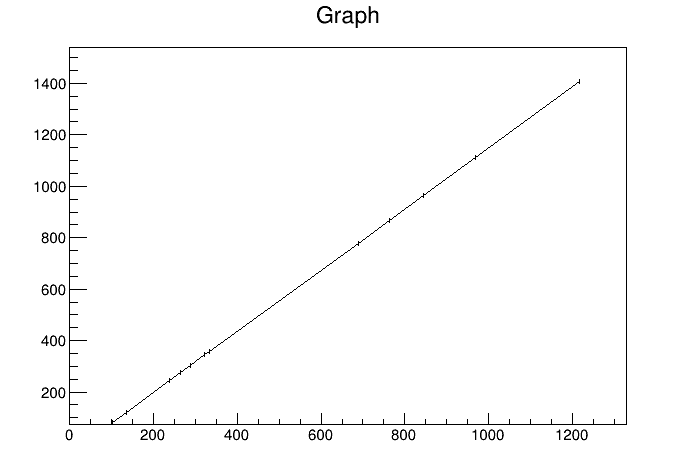


****************************************
Minimizer is Minuit / Migrad
Chi2                      =    0.0859737
NDf                       =           10
Edm                       =  8.99487e-21
NCalls                    =           40
p0                        =     -39.8436   +/-   0.0475225   
p1                        =      1.18969   +/-   7.64204e-05 


In [18]:
//点值以及误差值的设定
double ch_pre[12] = {101.64, 135.98, 239.0, 265.81, 288.05, 322.88, 332.75, 688.20, 762.60, 843.84, 968.22, 1217.05};
double ch_error_pre[12] = {3.75822e-04, 3.78992e-04, 7.60790e-04, 9.04701e-04, 4.71661e-04, 3.68731e-04, 2.81683e-04, 7.22039e-04, 1.61396e-03, 8.00489e-04, 8.55644e-04, 7.78963e-04};
double en_pre[12] = {81.0, 121.78, 244.7, 276.4, 302.9, 344.28, 356.0, 778.9, 867.37, 964.08, 1112.1, 1408.0};
double en_error_pre[12] = {0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0};

TGraphErrors *h1_pre = new TGraphErrors(12,ch_pre,en_pre,ch_error_pre,en_error_pre);
TGraph *h2_pre = new TGraph(12,ch_pre,en_pre);

h2_pre->GetXaxis()->SetTitle("Channel");
h2_pre->GetYaxis()->SetTitle("Energy(keV)");

c1->Clear();
TF1 *linear_relation_pre = new TF1("linear_relation_pre", "[0]+[1]*x");//定义线性函数

double par0_pre, par1_pre;
h2_pre->Fit("linear_relation_pre");
par0_pre = linear_relation_pre->GetParameter(0);
par1_pre = linear_relation_pre->GetParameter(1);
h1_pre->Draw("ALP");
c1->Draw();

<font size =4> 此时刻度公式的系数的不确定值大大缩小了，p0的不确定值由原来的6缩小为0.05，p1的不确定值由原来的0.006缩小为7.64204e-05

- <font size =4>对二次函数形式的刻度公式进行拟合

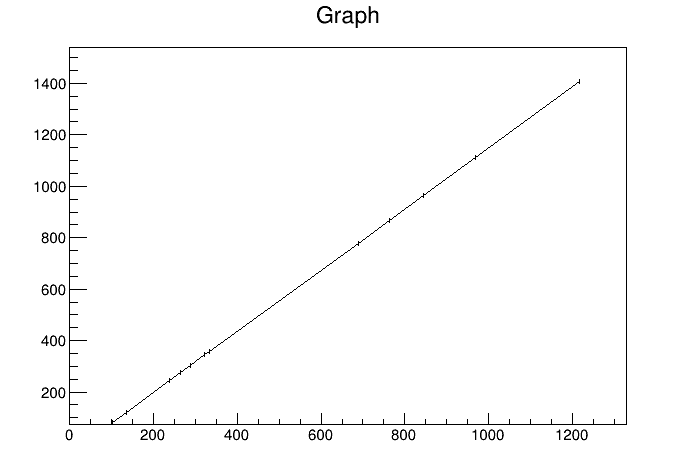


****************************************
Minimizer is Minuit / Migrad
Chi2                      =    0.0756632
NDf                       =            9
Edm                       =  4.43769e-15
NCalls                    =           66
p0                        =     -39.9171   +/-   0.0813384   
p1                        =      1.19005   +/-   0.000336946 
p2                        = -2.93066e-07   +/-   2.64633e-07 


In [19]:
TF1 *poly_relation = new TF1("poly_relation", "[0]+x*[1]+x*x*[2]", 0, 2500);//定义二次函数形式刻度公式
h2_pre->Fit("poly_relation");
h1_pre->Draw("ALP");
c1->Draw();


<font size =4> 由此可见，其二次项系数非常小，因此HPGe探测器在0-2500ch值范围内保持了很好的线性关系

# 利用上述关系将能谱还原为刻度后的能谱
- <font size =4>一次函数

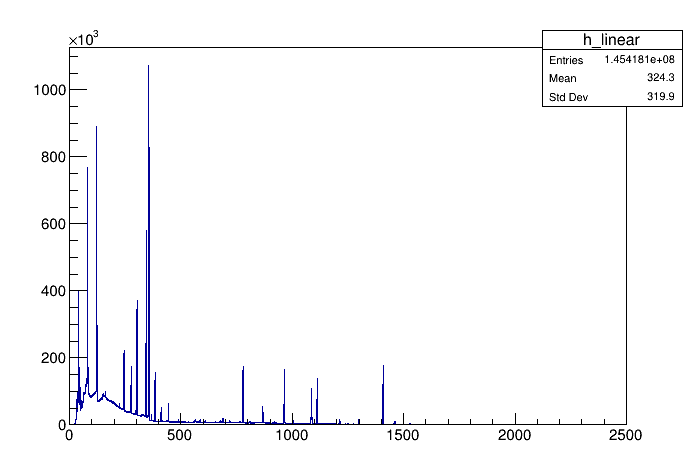

In [20]:
TH1D *h_linear = new TH1D("h_linear","",10000,0,2500);//h1为刻度后的gamma谱
    TRandom3 *r = new TRandom3(0);
    int Nbins = h_gammaraw->GetXaxis()->GetNbins(); //h0为未刻度的gamma谱。
    for(int i=0; i<Nbins; i++)
    {
        
        Long64_t eN = h_gammaraw->GetBinContent(i);// GetBinContent()提取每个bin的计数
        Double_t e = h_gammaraw->GetBinLowEdge(i);// GetBinLowEdge()提取每个bin左边界的横坐标x。
        for(Long64_t j=0; j<eN; j++)
        {
            Double_t ea = e+r->Rndm()*0.2;// 添加随机数是为了将该bin中填充的事例的值均匀的遍布整个bin
            ea=par1_pre*ea+par0_pre;//par1_pre与par0_pre为上面获得的线性刻度系数
            h_linear->Fill(ea);
        }
    }
h_linear->Draw();
c1->Draw();

- <font size =4>二次函数

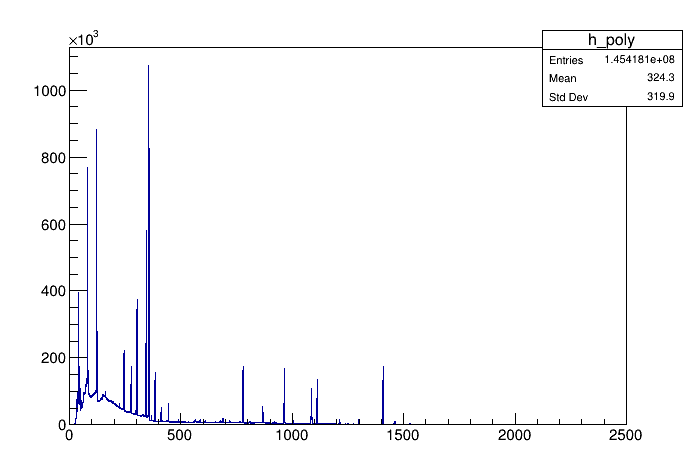

In [21]:
TH1D *h_poly = new TH1D("h_poly","",10000,0,2500);//h1为刻度后的gamma谱
    for(int i=0; i<Nbins; i++)
    {
        
        Long64_t eN = h_gammaraw->GetBinContent(i);// GetBinContent()提取每个bin的计数
        Double_t e = h_gammaraw->GetBinLowEdge(i);// GetBinLowEdge()提取每个bin左边界的横坐标x。
        for(Long64_t j=0; j<eN; j++)
        {
            Double_t ea = e+r->Rndm()*0.2;// 添加随机数是为了将该bin中填充的事例的值均匀的遍布整个bin
            ea=1.19*ea-39.92-2.93066e-07*ea*ea;//此为二次函数系数
            h_poly->Fill(ea);
        }
    }
h_poly->Draw();
c1->Draw();

# 残差图评估校准
- <font size =4 > 一次函数

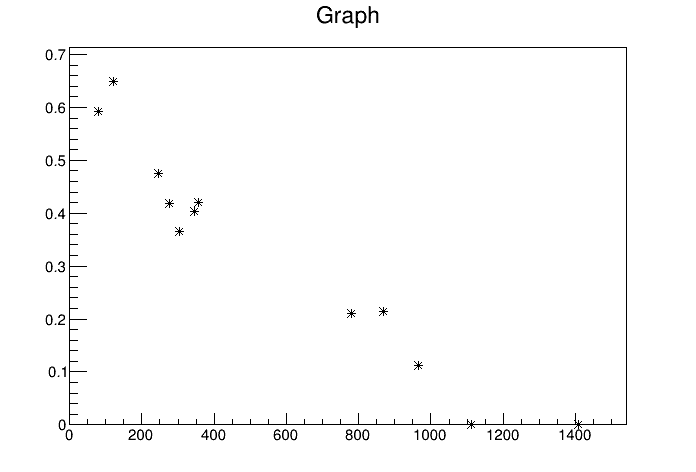

In [22]:
//标准源能量
double en_stan[12] = {81, 121.78, 244.7, 276.4, 302.9, 344.28, 356.0, 778.9, 867.37, 964.08, 1112.1, 1408};
//计算各个能量点的残差
double minus[12] = {par0+par1*101.64-81, \
                    par0+par1*135.98-121.78, \
                    par0+par1*239.2-244.7, \
                    par0+par1*265.81-276.4, \
                    par0+par1*288.05-302.9, \
                    par0+par1*322.88-344.28, \
                    par0+par1*332.75-356.0, \
                    par0+par1*688.20-778.9, \
                    par0+par1*762.6-867.37, \
                    par0+par1*843.84-964.08, \
                    par0+par1*968.22-1112.1, \
                    par0+par1*1217.05-1408};

TGraph *test = new TGraph(12,en_stan,minus);
test->Draw("AP*");
c1->Draw();

<font size =4> 可见线性关系的残差均小于1keV说明校准比较成功。但是由残差图看来，能量值越小的地方偏差越大，说明有更好的关系可以对刻度公式进行描述。下面对二次函数的残差进行作图。

- <font size =4> 二次函数

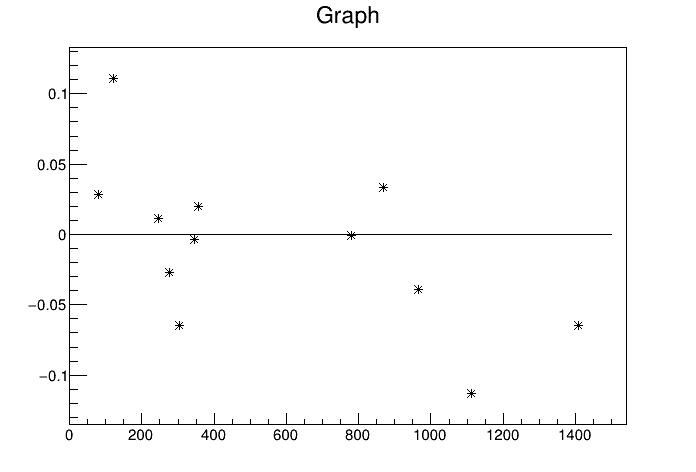

In [23]:
//计算各个能量点的残差
double minus_poly[12] = {1.19*101.64-39.92-2.93066e-07*101.64*101.64-81, \
                         1.19*135.98-39.92-2.93066e-07*135.98*135.98-121.78, \
                         1.19*239.2-39.92-2.93066e-07*239.2*239.2-244.7, \
                         1.19*265.81-39.92-2.93066e-07*265.81*265.81-276.4, \
                         1.19*288.05-39.92-2.93066e-07*288.05*288.05-302.9, \
                         1.19*322.88-39.92-2.93066e-07*322.88*322.88-344.28, \
                         1.19*332.75-39.92-2.93066e-07*332.75*332.75-356.0, \
                         1.19*688.20-39.92-2.93066e-07*688.20*688.20-778.9, \
                         1.19*762.6-39.92-2.93066e-07*762.6*762.6-867.37, \
                         1.19*843.84-39.92-2.93066e-07*843.84*843.84-964.08, \
                         1.19*968.22-39.92-2.93066e-07*968.22*968.22-1112.1, \
                         1.19*1217.05-39.92-2.93066e-07*1217.05*1217.05-1408.0};

TGraph *test_2 = new TGraph(12,en_stan,minus_poly);

//对残差为0的线进行表示
double line_x[2] = {0, 1500};
double line_y[2] = {0, 0};
TGraph *line = new TGraph(2, line_x, line_y);

test_2->Draw("AP*");
line->Draw("same");

c1->Draw();

<font size =4> 由二次函数的残差图可以看出，不仅残差关于能量值的依赖关系基本解除了，而且残差在数值上也变得更小了，这说明二次函数的刻度公式是描述HPGe的能量刻度的更好选择

# 使用自定义函数对各个能量峰进行拟合

- <font size = 4>自定义函数

In [24]:
double fun(double *x, double *par)//高斯函数par[0-2]+线性函数par[3-4]
{
   return  par[0]*TMath::Exp(-0.5*((x[0]-par[1])/par[2]) * ((x[0]-par[1])/par[2])) + par[3]+x[0]*par[4];
}


- <font size = 4>定义拟合函数

In [25]:
//定义拟合函数

//设置输入量
void def_Fit(TH1F *hist, double height, double middle, double r_fit, double l_fit, double r_show, double l_show){
    TF1 *ffit = new TF1("ffit", fun, 0, 2500, 5);
    ffit->SetParameter(0, height);
    ffit->SetParameter(1, middle);
    ffit->SetParameter(2, 1);
    ffit->SetParameter(3, 1e3);
    ffit->SetParameter(4, 0.01);
    
    hist->GetXaxis()->SetRangeUser(0,2500);
    hist->Fit("ffit", " ", " ", r_fit, l_fit);//进行拟合
    hist->Draw();
    hist->GetXaxis()->SetRangeUser(r_show, l_show);
}

- <font size = 4>进行拟合

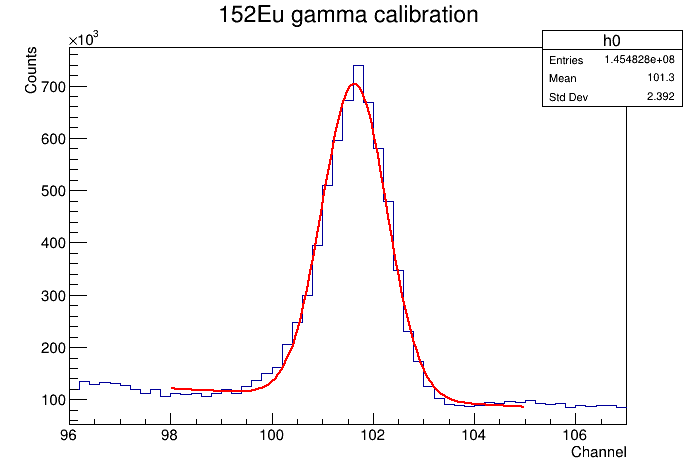

 FCN=34935.6 FROM MIGRAD    STATUS=CONVERGED     237 CALLS         238 TOTAL
                     EDM=9.93702e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.01595e+05   3.98000e+02   2.85429e+01   4.92935e-07
   2  p1           1.01639e+02   3.98548e-04   4.84654e-05   7.73106e-01
   3  p2           6.38257e-01   3.84619e-04   2.45859e-05  -1.67302e-01
   4  p3           6.11123e+05   2.87374e+03   5.96097e+00   1.79755e-06
   5  p4          -4.99984e+03   2.82526e+01   5.86071e-02   1.83270e-04


In [26]:
def_Fit(h_gammaraw, 7e5, 101, 98, 105, 96, 107);
c1->Draw();

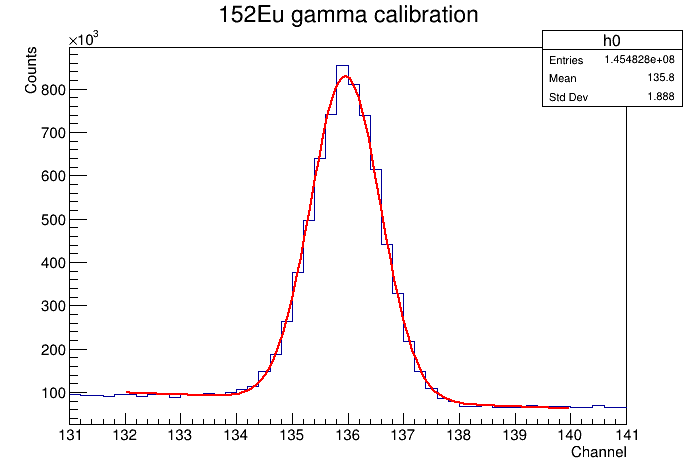

 FCN=8777.75 FROM MIGRAD    STATUS=CONVERGED     208 CALLS         209 TOTAL
                     EDM=2.70874e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.48876e+05   4.26625e+02   1.54521e+01   1.10452e-08
   2  p1           1.35967e+02   3.22789e-04   6.48339e-05  -4.52042e-02
   3  p2           6.27267e-01   2.95388e-04   9.93483e-06   5.68364e-02
   4  p3           7.05926e+05   2.74960e+03   2.43614e+00  -8.42168e-08
   5  p4          -4.59780e+03   2.01356e+01   1.78546e-02  -1.15659e-05


In [27]:
def_Fit(h_gammaraw, 8e5, 136, 132, 140, 131, 141);
c1->Draw();

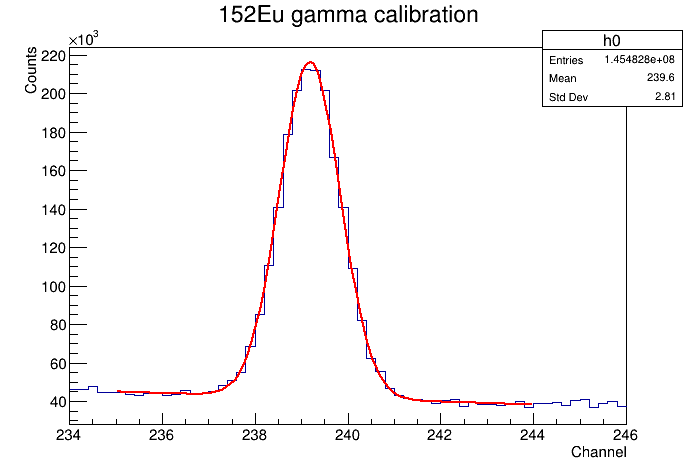

 FCN=1386.69 FROM MIGRAD    STATUS=CONVERGED     206 CALLS         207 TOTAL
                     EDM=8.49565e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.74410e+05   2.17917e+02   3.14741e+00  -9.59350e-09
   2  p1           2.39191e+02   7.78552e-04   1.14055e-04  -1.45080e-02
   3  p2           6.56212e-01   7.45773e-04   9.99174e-06  -9.48818e-03
   4  p3           2.20197e+05   2.89586e+03   6.26381e-01  -1.29553e-08
   5  p4          -7.45400e+02   1.20699e+01   2.61263e-03  -3.47157e-06


In [28]:
def_Fit(h_gammaraw, 2e5, 239, 235, 244, 234, 246);
c1->Draw();

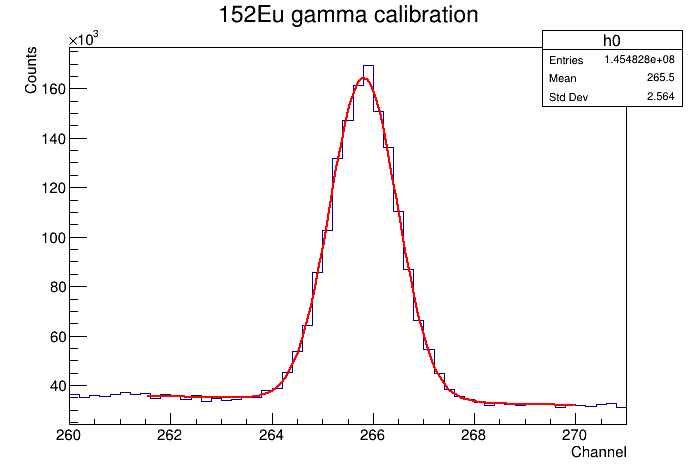

 FCN=1141.24 FROM MIGRAD    STATUS=CONVERGED     196 CALLS         197 TOTAL
                     EDM=4.63535e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.30404e+05   1.89945e+02   2.47897e+00  -1.66826e-06
   2  p1           2.65822e+02   9.21704e-04   1.26754e-04  -3.91542e-01
   3  p2           6.64546e-01   9.00108e-04   1.08198e-05   7.55499e-01
   4  p3           1.51890e+05   3.08964e+03   5.27271e-01   1.31241e-05
   5  p4          -4.44189e+02   1.16258e+01   1.98390e-03   3.48252e-03


In [29]:
def_Fit(h_gammaraw, 1.6e5, 266, 261.5, 270, 260, 271);
c1->Draw();

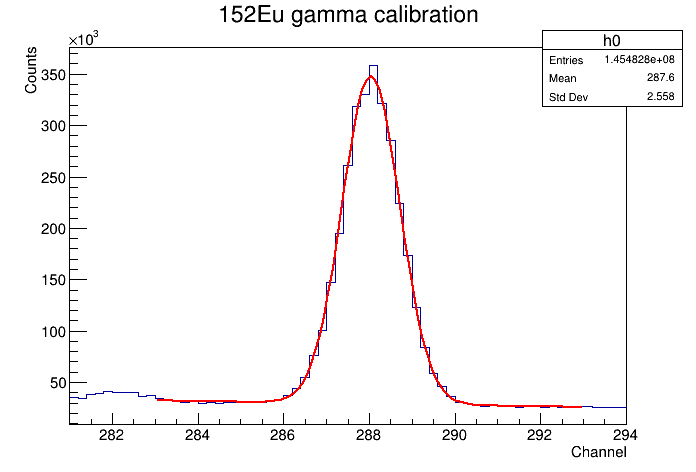

 FCN=3049.49 FROM MIGRAD    STATUS=CONVERGED     196 CALLS         197 TOTAL
                     EDM=3.33828e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.18641e+05   2.65554e+02   5.66401e+00   3.12895e-07
   2  p1           2.88048e+02   4.98782e-04   1.37352e-04  -2.13006e-02
   3  p2           6.75475e-01   4.49323e-04   9.06771e-06   6.34164e-02
   4  p3           2.13489e+05   2.45997e+03   7.61529e-01  -9.07895e-07
   5  p4          -6.40408e+02   8.53349e+00   2.64201e-03  -2.60215e-04


In [30]:
def_Fit(h_gammaraw, 3.5e5, 288, 283, 293, 281, 294);
c1->Draw();

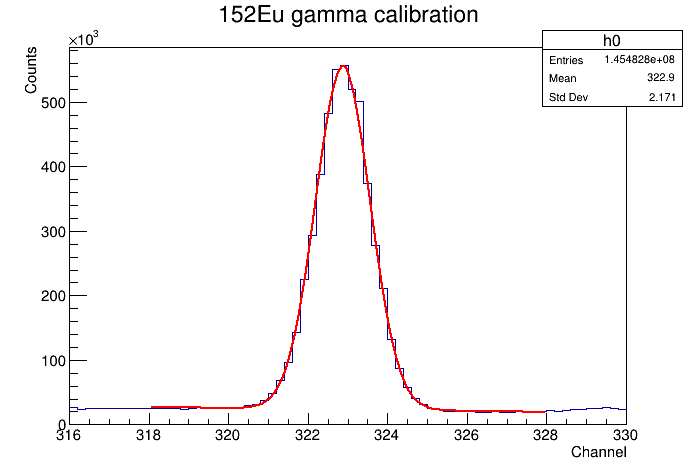

 FCN=7523.39 FROM MIGRAD    STATUS=CONVERGED     198 CALLS         199 TOTAL
                     EDM=1.03895e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.32583e+05   3.26866e+02   1.09312e+01  -4.52075e-08
   2  p1           3.22884e+02   3.63552e-04   1.53963e-04  -1.20623e-01
   3  p2           6.94164e-01   3.15018e-04   1.00451e-05  -2.10689e-02
   4  p3           2.69633e+05   2.47925e+03   1.10665e+00  -2.22484e-07
   5  p4          -7.62849e+02   7.66312e+00   3.42136e-03  -7.21830e-05


In [31]:
def_Fit(h_gammaraw, 5e5, 323, 318, 328, 316, 330);
c1->Draw();

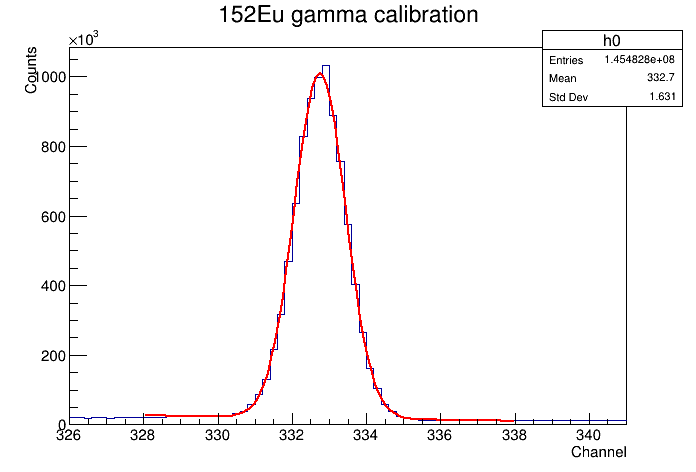

 FCN=11800.6 FROM MIGRAD    STATUS=CONVERGED     205 CALLS         206 TOTAL
                     EDM=1.7669e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.90319e+05   4.35165e+02   5.04196e+00  -1.29984e-06
   2  p1           3.32757e+02   2.51613e-04  -1.39063e-06  -2.51563e+00
   3  p2           6.94658e-01   2.09544e-04   9.30960e-07  -2.44789e+00
   4  p3           5.48158e+05   2.29923e+03  -1.44183e+00  -1.05483e-05
   5  p4          -1.59114e+03   6.87675e+00   4.04744e-03  -3.51995e-03


In [32]:
def_Fit(h_gammaraw, 1e6, 333, 328, 338, 326, 341);
c1->Draw();

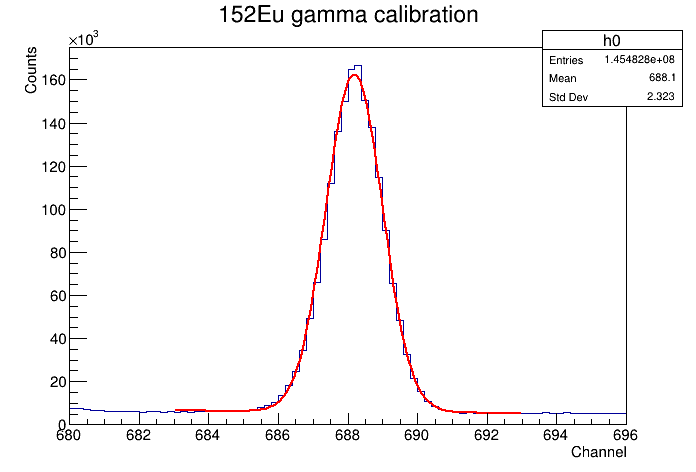

 FCN=2531.28 FROM MIGRAD    STATUS=CONVERGED     197 CALLS         198 TOTAL
                     EDM=3.37714e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.56586e+05   1.63678e+02   3.16968e+00  -9.81431e-07
   2  p1           6.88196e+02   7.18840e-04   3.28157e-04   1.02519e+00
   3  p2           8.09383e-01   6.27326e-04   1.14293e-05   2.42396e-01
   4  p3           8.88962e+04   2.69307e+03   3.42761e-01   2.26822e-05
   5  p4          -1.20618e+02   3.91386e+00   4.98113e-04   1.56213e-02


In [33]:
def_Fit(h_gammaraw, 1.6e5, 688, 683, 693, 680, 696);
c1->Draw();

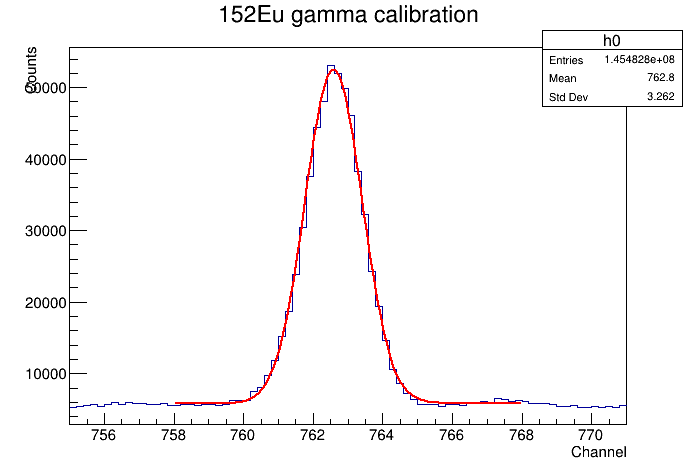

 FCN=906.526 FROM MIGRAD    STATUS=CONVERGED     199 CALLS         200 TOTAL
                     EDM=8.5555e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.66397e+04   9.41131e+01   1.09948e+00   7.09814e-07
   2  p1           7.62602e+02   1.51459e-03   3.63637e-04   2.63788e-01
   3  p2           8.19431e-01   1.40207e-03   1.50274e-05   9.26192e-02
   4  p3          -2.66633e+03   3.00691e+03   1.90810e-01   6.80258e-06
   5  p4           1.11282e+01   3.93924e+00   2.50029e-04   5.18496e-03


In [34]:
def_Fit(h_gammaraw, 5e4, 763, 758, 768, 755, 771);
c1->Draw();

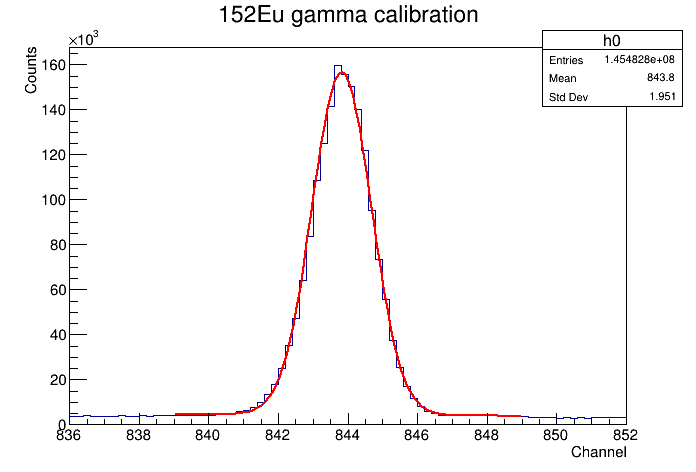

 FCN=3667.51 FROM MIGRAD    STATUS=CONVERGED     197 CALLS         198 TOTAL
                     EDM=4.59755e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.52194e+05   1.55458e+02   3.63709e+00   1.90681e-08
   2  p1           8.43836e+02   7.37573e-04   4.02372e-04  -2.23343e-01
   3  p2           8.51605e-01   6.29440e-04   1.38189e-05   3.18989e-01
   4  p3           7.95370e+04   2.87747e+03   3.63365e-01   2.63404e-05
   5  p4          -8.91463e+01   3.40763e+00   4.30346e-04   2.19750e-02


In [35]:
def_Fit(h_gammaraw, 1.6e5, 844, 839, 849, 836, 852);
c1->Draw();

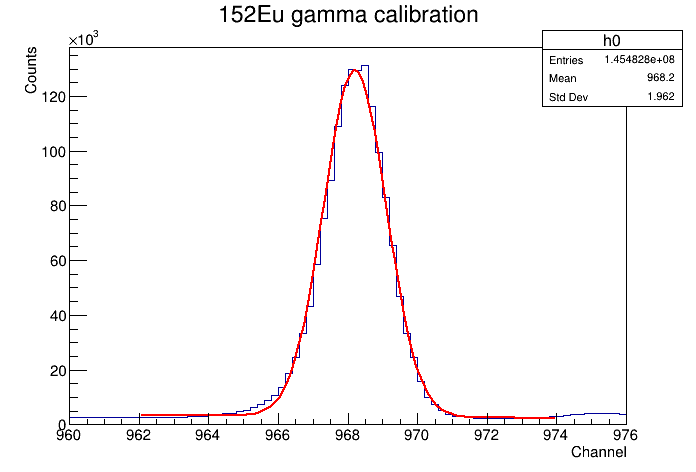

 FCN=10378 FROM MIGRAD    STATUS=CONVERGED     186 CALLS         187 TOTAL
                     EDM=2.29816e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.26564e+05   1.38926e+02   5.38717e+00   3.24864e-08
   2  p1           9.68214e+02   8.21121e-04   4.61680e-04  -7.68870e-02
   3  p2           9.03449e-01   7.07237e-04   2.61265e-05   2.33226e-02
   4  p3           8.58417e+04   1.98028e+03   4.41429e-01  -8.11878e-07
   5  p4          -8.56925e+01   2.04505e+00   4.55853e-04  -7.85131e-04


In [36]:
def_Fit(h_gammaraw, 1.2e5, 968, 962, 974, 960, 976);
c1->Draw();

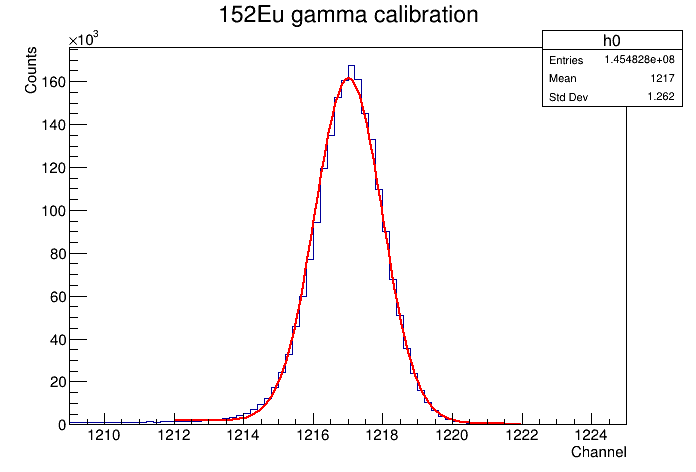

 FCN=7671.7 FROM MIGRAD    STATUS=CONVERGED     185 CALLS         186 TOTAL
                     EDM=8.42569e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.60161e+05   1.47193e+02   4.96578e+00   2.58749e-07
   2  p1           1.21703e+03   7.27177e-04   5.80327e-04  -9.75729e-03
   3  p2           9.64895e-01   5.91917e-04   1.89828e-05  -1.19735e-01
   4  p3           2.34233e+05   2.25160e+03   2.65088e-01   8.25425e-06
   5  p4          -1.91448e+02   1.84633e+00   2.17400e-04   1.00455e-02


In [37]:
def_Fit(h_gammaraw, 1.6e5, 1217, 1212, 1222, 1209, 1225);
c1->Draw();

- <font size =4> 计算半高宽

In [40]:
//根据半高宽公式定义计算函数
double FWHW(double sigma){
    double width = 2*sqrt(2*log(2))*sigma;
    return width;
}

In [45]:
//输出不同能量对应的半高宽
cout << FWHW(0.638) << ", " << FWHW(0.627) << ", " << FWHW(0.656) << ", " << FWHW(0.664) << ", " \
<< FWHW(0.675) << ", " << FWHW(0.694) << ", " << FWHW(0.695) << ", " << FWHW(0.809) << ", " \
<< FWHW(0.819) << ", " << FWHW(0.852) << ", " << FWHW(0.903) << ", " << FWHW(0.965) << endl;

1.50238, 1.47647, 1.54476, 1.5636, 1.5895, 1.63425, 1.6366, 1.90505, 1.9286, 2.00631, 2.1264, 2.2724


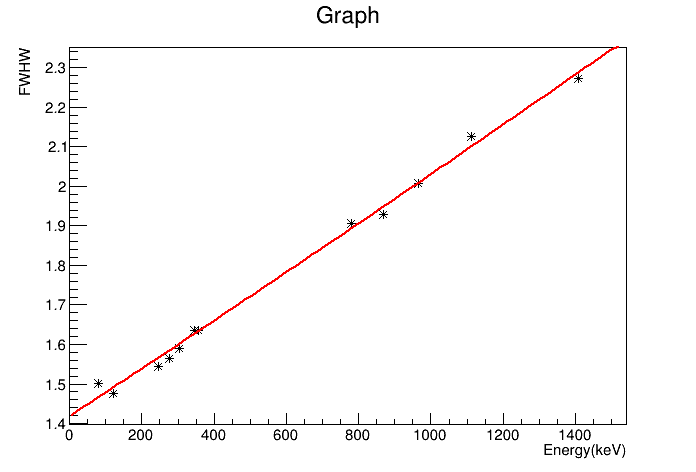


****************************************
Minimizer is Minuit / Migrad
Chi2                      =   0.00396261
NDf                       =            9
Edm                       =  8.67512e-22
NCalls                    =           66
p0                        =      1.41651   +/-   0.0163725   
p1                        =  0.000599494   +/-   6.14914e-05 
p2                        =  1.28531e-08   +/-   4.27866e-08 


In [46]:
//用二次函数进行拟合
double width[12] = {1.50238, 1.47647, 1.54476, 1.5636, 1.5895, 1.63425, 1.6366, 1.90505, 1.9286, 2.00631, 2.1264, 2.2724};
TGraph *width_e = new TGraph(12, en_stan, width);
TF1 *w_e_relation = new TF1("w_e_relation", "[0]+[1]*x+[2]*x*x");

width_e->GetYaxis()->SetTitle("FWHW");
width_e->GetXaxis()->SetTitle("Energy(keV)");
width_e->Draw("AP*");
width_e->Fit("w_e_relation");
c1->Draw();